In [ ]:
#Using the latest data, perform the same analysis with opposition as CSK, venue as Chepauk.

In [ ]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt

In [ ]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches_updated_mens_ipl.csv')
iplmatches = pd.read_csv('IPL_ball_by_ball_updated.csv')


In [ ]:
iplmatches.head(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1

def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1

def playerStatistics(df):

    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

    return df

In [ ]:
ps = playerStatistics(iplmatches)

In [ ]:
ps.head(10)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Badoni,23,399,325,18,127,124,28,3,24,19,122.769231,17.347826,18.055556,7.558140
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
4,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000
5,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000
6,A Flintoff,3,62,57,2,24,23,2,1,5,2,108.771930,20.666667,28.500000,8.142857
7,A Kumble,15,35,49,2,24,21,1,0,3,0,71.428571,2.333333,24.500000,16.333333
8,A Manohar,13,222,165,12,58,72,5,0,20,10,134.545455,17.076923,13.750000,5.500000
9,A Mishra,55,381,440,31,199,183,22,0,31,5,86.590909,6.927273,14.193548,12.222222


In [ ]:
#Player Statistics is above Data Frame

In [ ]:
#Performane in different stages of play

In [ ]:
def phase(ball):
    if ball <= 6:
        return 'Powerplay'
    elif ball <= 15:
        return 'Middle'
    else:
        return 'Death'

In [ ]:
iplmatches['phase'] = iplmatches['ball'].apply(lambda x: phase(x))

In [ ]:
def phasesOfplay(df, current_phase):

    df = df[df.phase == current_phase]
    df.reset_index(inplace = True, drop = True)

    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

    return df

In [ ]:
pp_df = phasesOfplay(iplmatches, 'Powerplay')
mid_df = phasesOfplay(iplmatches, 'Middle')
dth_df = phasesOfplay(iplmatches, 'Death')

In [ ]:
pp_df.head(2)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,5.00,7.0,7.0
1,A Badoni,4,9,22,2,16,5,0,0,1,0,40.909091,2.25,11.0,22.0


In [ ]:
mid_df.head(2)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,5,61,41,0,16,13,5,0,2,5,148.780488,12.200000,41.000000,5.857143
1,A Badoni,13,146,134,6,53,56,10,0,10,5,108.955224,11.230769,22.333333,8.933333


In [ ]:
dth_df.head(2)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,22,214,148,14,40,69,15,1,13,10,144.594595,9.727273,10.571429,6.434783
1,A Badoni,15,244,169,10,58,63,18,3,13,14,144.378698,16.266667,16.900000,6.259259


In [ ]:
#Innings Analysis

In [ ]:
def ByInning(df, innings):

    df = df[df.innings == innings]
    df.reset_index(inplace = True, drop = True)


    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

    return df

In [ ]:
ing1_df = ByInning(iplmatches, 1)
ing2_df = ByInning(iplmatches, 2)

In [ ]:
ing1_df.head(2)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,13,166,115,7,32,53,13,1,6,10,144.347826,12.769231,16.428571,7.187500
1,A Badoni,11,257,191,9,69,75,16,2,15,14,134.554974,23.363636,21.222222,6.586207


In [ ]:
ing2_df.head(2)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,10,114,81,8,29,30,7,0,10,5,140.740741,11.400000,10.125000,5.400000
1,A Badoni,12,142,134,9,58,49,12,1,9,5,105.970149,11.833333,14.888889,9.571429


In [ ]:
comp = ing1_df[['striker', 'RPI']].merge(ing2_df[['striker', 'RPI']], on = 'striker', how = 'inner').rename(columns = {'RPI_x':'1st_RPI', 'RPI_y':'2nd_RPI' })

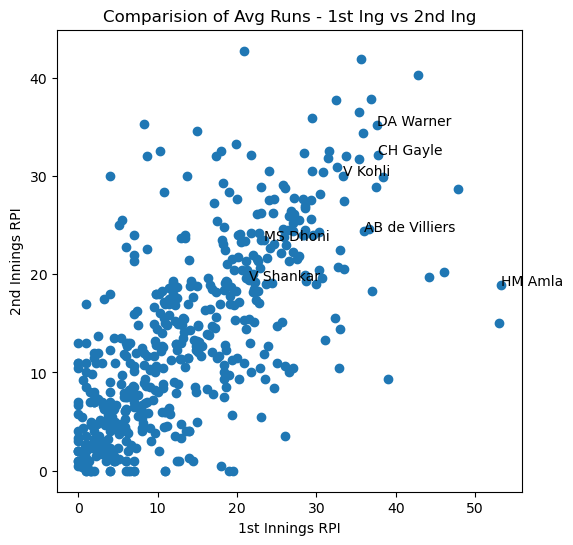

In [ ]:
plt.figure(figsize = (6, 6))
plt.scatter(comp['1st_RPI'], comp['2nd_RPI'] )
plt.xlabel('1st Innings RPI')
plt.ylabel('2nd Innings RPI')
plt.title('Comparision of Avg Runs - 1st Ing vs 2nd Ing')

annotations=list(comp['striker'])
selected_players = ['CH Gayle', 'V Kohli', 'AB de Villiers', 'DA Warner', 'V Shankar', 'HM Amla', 'MS Dhoni']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (comp['1st_RPI'][i], comp['2nd_RPI'][i]))


plt.show()

In [ ]:
comp[comp['1st_RPI'] > 40]

,striker,1st_RPI,2nd_RPI
76,B Sai Sudharsan,47.857143,28.666667
132,DP Conway,42.800000,40.285714
162,HM Amla,53.250000,18.875000
222,KR Mayers,44.200000,19.750000
228,Kamran Akmal,53.000000,15.000000
374,RM Patidar,46.142857,20.250000


In [ ]:
def ByOpposition(df, current_opposition):

    df = df[df.bowling_team == current_opposition]
    df.reset_index(inplace = True, drop = True)


    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

    return df

In [ ]:
ByOpposition(iplmatches, 'Royal Challengers Bangalore').head(3)

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,5,55,42,4,15,19,2,0,2,4,130.952381,11.000000,10.500000,7.000000
1,A Badoni,3,47,53,3,26,19,2,0,6,0,88.679245,15.666667,17.666667,8.833333
2,A Chandila,1,4,6,0,2,4,0,0,0,0,66.666667,4.000000,6.000000,6.000000


# Problem Statement: How good is player X against CSK in M Chinnaswamy Stadium when they’re playing 3 spinners?
#Filters in our problem statement:
#Stadium = ''M Chinnaswamy Stadium''
#Phase = 'Middle Overs'
#Oppostion Team = 'Chennai Super Kings'

In [ ]:
def ByCustom(df, current_venue, current_phase, current_opposition):

    df = df[df.venue == current_venue]
    df = df[df.phase == current_phase]
    df = df[df.bowling_team == current_opposition]

    df.reset_index(inplace = True, drop = True)

    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

    return df

In [ ]:
df = ByCustom(iplmatches, 'M Chinnaswamy Stadium', 'Middle', 'Chennai Super Kings')

In [ ]:
df['dot_percentage'] = df.apply(lambda x: x['dots']/x['balls'], axis = 1)

In [ ]:
df.head()

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,dot_percentage
0,AB de Villiers,3,15,12,1,7,3,0,0,0,2,125.000000,5.0,12.0,6.0,0.583333
1,AT Rayudu,1,11,7,1,3,1,1,0,2,0,157.142857,11.0,7.0,3.5,0.428571
2,CH Gayle,1,39,31,0,13,13,0,0,2,3,125.806452,39.0,31.0,6.2,0.419355
3,D Wiese,1,2,2,0,0,2,0,0,0,0,100.000000,2.0,2.0,2.0,0.000000
4,DR Smith,1,0,1,1,1,0,0,0,0,0,0.000000,0.0,1.0,1.0,1.000000


In [ ]:
wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.13, 0.27, 0.16, 0.45

In [ ]:
df = df[df.innings >= 2 ]

In [ ]:
#step1: square of all values
df['calc_SR'] = df['SR'].apply(lambda x: x*x)
df['calc_RPI'] = df['RPI'].apply(lambda x: x*x)
df['calc_BPD'] = df['BPD'].apply(lambda x: x*x)
df['calc_dot_percentage'] = df['dot_percentage'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_dot_percentage']].sum(axis = 0))

df['calc_SR'] = df['calc_SR'].apply(lambda x: x/sq_sr)
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x/sq_rpi)
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x/sq_bpd)
df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x/sq_dot_percentage)

df['calc_SR'] = df['calc_SR'].apply(lambda x: x*wt_sr)
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x*wt_rpi)
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x*wt_bpd)
df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x*wt_dot_percentage)

best_sr, worst_sr = max(df['calc_SR']), min(df['calc_SR'])
best_rpi, worst_rpi = max(df['calc_RPI']), min(df['calc_RPI'])
best_bpd, worst_bpd = max(df['calc_BPD']), min(df['calc_BPD'])
best_dot_percentage, worst_dot_percentage = min(df['calc_dot_percentage']), max(df['calc_dot_percentage'])

In [ ]:
df['dev_best_SR'] = df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
df['dev_best_RPI'] = df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
df['dev_best_BPD'] = df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
df['dev_best_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))

df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1)

df['dev_worst_SR'] = df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
df['dev_worst_RPI'] = df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
df['dev_worst_BPD'] = df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
df['dev_worst_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))

df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1)

In [ ]:
df['score'] = df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [ ]:
df[['striker', 'score']].head()

,striker,score
0,AB de Villiers,0.001673
9,KD Karthik,0.001545
20,V Kohli,1.000000


In [ ]:
df[[ 'striker','innings', 'runs', 'balls', 'dismissals', 'dot_percentage', 'score']].sort_values(['score'], ascending = False).reset_index(drop = True).head(25)

,striker,innings,runs,balls,dismissals,dot_percentage,score
0,V Kohli,5,122,91,2,0.329670,1.000000
1,AB de Villiers,3,15,12,1,0.583333,0.001673
2,KD Karthik,2,15,12,2,0.333333,0.001545


# Problem Statement: How good is player X against KKR in EDENS in middle overs
#Filters in our problem statement:
#Stadium = 'Eden Gardens'
#Phase = 'Middle Overs'
#Oppostion Team = 'Kolkata Knight Riders'

In [ ]:
df = ByCustom(iplmatches, 'Eden Gardens', 'Middle', 'Kolkata Knight Riders')

In [ ]:
df['dot_percentage'] = df.apply(lambda x: x['dots']/x['balls'], axis = 1)
df.head()

,striker,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,dot_percentage
0,A Mishra,2,31,30,1,9,17,1,0,3,0,103.333333,15.500000,30.000000,10.000000,0.300000
1,A Singh,1,0,2,1,2,0,0,0,0,0,0.000000,0.000000,2.000000,2.000000,1.000000
2,A Symonds,2,44,49,0,24,18,1,0,6,0,89.795918,22.000000,49.000000,8.166667,0.489796
3,AB de Villiers,4,115,68,2,22,27,3,0,7,9,169.117647,28.750000,34.000000,4.250000,0.323529
4,AC Gilchrist,3,11,23,3,16,5,1,0,1,0,47.826087,3.666667,7.666667,23.000000,0.695652


In [ ]:
wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.13, 0.27, 0.16, 0.45
df = df[df.innings >= 2 ]

In [ ]:
#step1: square of all values
df['calc_SR'] = df['SR'].apply(lambda x: x*x)
df['calc_RPI'] = df['RPI'].apply(lambda x: x*x)
df['calc_BPD'] = df['BPD'].apply(lambda x: x*x)
df['calc_dot_percentage'] = df['dot_percentage'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_dot_percentage']].sum(axis = 0))

df['calc_SR'] = df['calc_SR'].apply(lambda x: x/sq_sr)
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x/sq_rpi)
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x/sq_bpd)
df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x/sq_dot_percentage)

df['calc_SR'] = df['calc_SR'].apply(lambda x: x*wt_sr)
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x*wt_rpi)
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x*wt_bpd)
df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x*wt_dot_percentage)

best_sr, worst_sr = max(df['calc_SR']), min(df['calc_SR'])
best_rpi, worst_rpi = max(df['calc_RPI']), min(df['calc_RPI'])
best_bpd, worst_bpd = max(df['calc_BPD']), min(df['calc_BPD'])
best_dot_percentage, worst_dot_percentage = min(df['calc_dot_percentage']), max(df['calc_dot_percentage'])

df['dev_best_SR'] = df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
df['dev_best_RPI'] = df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
df['dev_best_BPD'] = df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
df['dev_best_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))

df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1)

df['dev_worst_SR'] = df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
df['dev_worst_RPI'] = df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
df['dev_worst_BPD'] = df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
df['dev_worst_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))

df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1)

In [ ]:
df['score'] = df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)
df[['striker', 'score']].head()

,striker,score
0,A Mishra,0.081278
2,A Symonds,0.154044
3,AB de Villiers,0.670185
4,AC Gilchrist,0.001182
6,AD Mathews,0.248606


In [ ]:
df[[ 'striker','innings', 'runs', 'balls', 'dismissals', 'dot_percentage', 'score']].sort_values(['score'], ascending = False).reset_index(drop = True).head(10)

,striker,innings,runs,balls,dismissals,dot_percentage,score
0,HH Pandya,3,69,33,1,0.212121,0.861670
1,Ishan Kishan,2,66,33,2,0.393939,0.816459
2,GJ Maxwell,6,165,94,3,0.340426,0.701396
3,AB de Villiers,4,115,68,2,0.323529,0.670185
4,YK Pathan,2,41,23,1,0.304348,0.634972
5,V Sehwag,2,50,29,2,0.275862,0.589616
6,CL White,2,49,30,1,0.266667,0.557587
7,CH Gayle,6,152,107,2,0.439252,0.519654
8,DR Smith,2,37,22,2,0.318182,0.501260
9,SS Iyer,2,63,47,1,0.255319,0.459878
